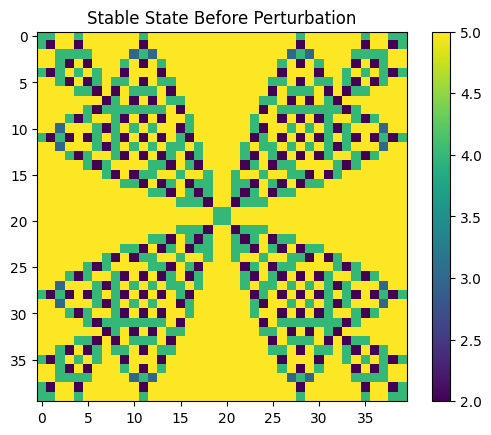

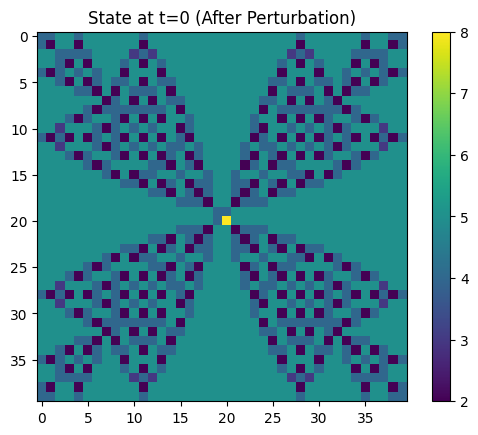

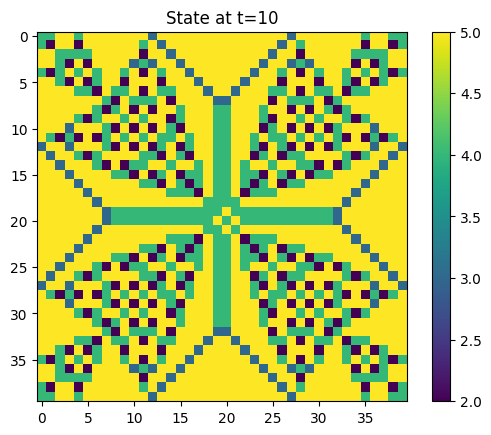

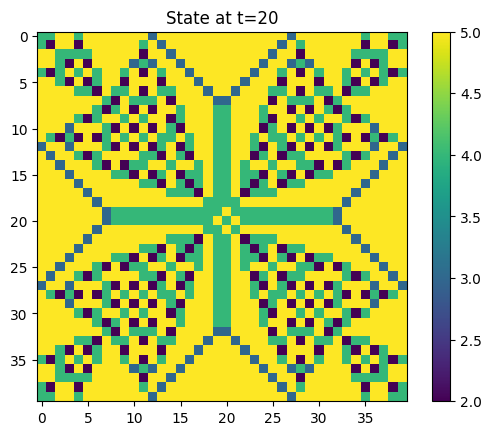

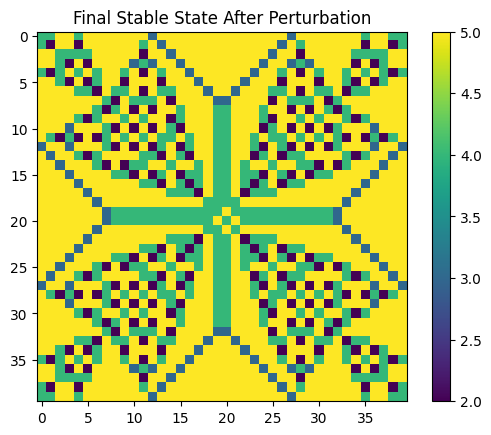

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def topple(grid, L, threshold):
    """Perform toppling until the grid stabilizes."""
    while True:
        unstable = np.where(grid >= threshold)
        if len(unstable[0]) == 0:
            break
        for i, j in zip(unstable[0], unstable[1]):
            grid[i, j] -= 4
            if i > 0:
                grid[i-1, j] += 1
            if i < L-1:
                grid[i+1, j] += 1
            if j > 0:
                grid[i, j-1] += 1
            if j < L-1:
                grid[i, j+1] += 1
    return grid

def perturb(grid, L, perturbation):
    """Add a perturbation to the center of the grid."""
    center = L // 2
    grid[center, center] += perturbation
    return grid

def plot_grid(grid, title):
    """Plot the grid."""
    plt.imshow(grid, cmap='viridis', interpolation='nearest')
    plt.title(title)
    plt.colorbar()
    plt.show()

def sandpile_model(L, threshold, perturbation):
    # Initialize the grid with the threshold value
    grid = np.full((L, L), threshold)
    
    # Run the system until it stabilizes
    grid = topple(grid, L, threshold)
    plot_grid(grid, "Stable State Before Perturbation")
    
    # Add a perturbation to the center
    grid = perturb(grid, L, perturbation)
    plot_grid(grid, "State at t=0 (After Perturbation)")
    
    # Run the system for 10 steps
    for _ in range(10):
        grid = topple(grid, L, threshold)
    plot_grid(grid, "State at t=10")
    
    # Run the system for another 10 steps (total 20 steps)
    for _ in range(10):
        grid = topple(grid, L, threshold)
    plot_grid(grid, "State at t=20")
    
    # Run the system until it stabilizes again
    grid = topple(grid, L, threshold)
    plot_grid(grid, "Final Stable State After Perturbation")

roll_number = 2021101113
L = ((roll_number%7)+1)*10
threshold = (roll_number%5)+3
perturbation = 4


sandpile_model(L, threshold, perturbation)